In [3]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import linear_model

%matplotlib inline
plt.style.use('seaborn')

DATA_DIR = "../bigdata/"

STOP_SPEED_THRESHOLD = 0.5


In [4]:
ais = pd.read_csv(DATA_DIR + 'vessel_locations-1-week-20180315.csv', parse_dates = ['timestamp'])

In [5]:
ais = ais.sort_values(by=['timestamp'])
ais.head()

,timestamp,mmsi,lon,lat,sog,cog,heading
0,2018-03-14 23:59:59.064,276776000,21.473023,61.126297,0.0,63.7,323
1,2018-03-14 23:59:59.066,230992260,21.472692,61.127272,0.0,268.4,184
2,2018-03-14 23:59:59.067,230992660,28.877223,61.877110,0.0,0.0,511
3,2018-03-14 23:59:59.074,230115340,21.464200,61.594145,0.0,198.4,264
4,2018-03-14 23:59:59.089,230052840,28.386033,61.608773,0.0,1.6,1


### How many vessels are there in this data set?

In [4]:
ais['mmsi'].nunique()

256

### Distribution of AIS observations geographically binned

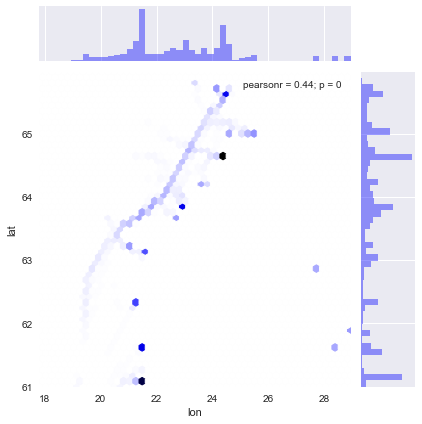

In [6]:
sns.jointplot(x=ais.lon, y=ais.lat, kind="hex", color="b")

See also: Seaborn documentation: [Visualizing the distribution of a dataset](https://seaborn.pydata.org/tutorial/distributions.html)

In [8]:
import geopandas as gpd

### Task: How many vessels visited Kemi during 16.3.2018?

1) Draw the port of Kemi as a shapefile polygon with this tool (or any other tool): http://gis.ucla.edu/apps/click2shp/

Hint: The port of Kemi is here: http://www.keminsatama.fi/fi/pallopanoraama.html 






2) Read the Kemi port area from a shape file:

In [ ]:
kemi_port = gpd.read_file(DATA_DIR + 'kemi.prj')

3) Read AIS-data to a GeoDataFrame:

In [ ]:
gdf = gpd.GeoDataFrame(ais, crs=crs, geometry=geometry)

See more information on geopandas from tutorial: https://cambridgespark.com/content/tutorials/geopandas/index.html

4) Make a geospatial inner join of the intersection of AIS observations and the port area:


In [ ]:
gpd.sjoin(gdf, kemi_port, how='inner', op='intersects')

5) Print and plot the result